In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython import display
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg') # svg是矢量图格式

def set_figsize(figsize=(5, 4)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize # 图片的尺寸为3.5，2.5

In [3]:
df = pd.read_excel('Trade.xlsx')
# df.head()
df

,Date,Order_Class,Sales,Transport,Trans_Cost,Region,Category,Box_Type
0,2010-10-13,低级,261.5400,火车,35.00,华北,办公用品,大型箱子
1,2012-02-20,其它,6.0000,火车,2.56,华南,办公用品,小型包裹
2,2011-07-15,高级,2808.0800,火车,5.81,华南,家具产品,中型箱子
3,2011-07-15,高级,1761.4000,大卡,89.30,华北,家具产品,巨型纸箱
4,2011-07-15,高级,160.2335,火车,5.03,华北,技术产品,中型箱子
...,...,...,...,...,...,...,...,...
8563,2012-11-15,高级,18.9100,火车,7.01,华东,办公用品,小型箱子
8564,2012-11-15,高级,685.7000,火车,20.79,华南,家具产品,大型箱子
8565,2012-11-15,高级,1024.1650,火车,5.99,华南,技术产品,小型箱子
8566,2009-01-23,中级,1383.2000,火车,12.14,华南,技术产品,小型箱子


In [4]:
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df.head()

,Date,Order_Class,Sales,Transport,Trans_Cost,Region,Category,Box_Type,year,month
0,2010-10-13,低级,261.5400,火车,35.00,华北,办公用品,大型箱子,2010,10
1,2012-02-20,其它,6.0000,火车,2.56,华南,办公用品,小型包裹,2012,2
2,2011-07-15,高级,2808.0800,火车,5.81,华南,家具产品,中型箱子,2011,7
3,2011-07-15,高级,1761.4000,大卡,89.30,华北,家具产品,巨型纸箱,2011,7
4,2011-07-15,高级,160.2335,火车,5.03,华北,技术产品,中型箱子,2011,7


/var/folders/6j/kc_963x15_x5ygyn0h922skm0000gn/T/ipykernel_60822/1273012783.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # svg是矢量图格式


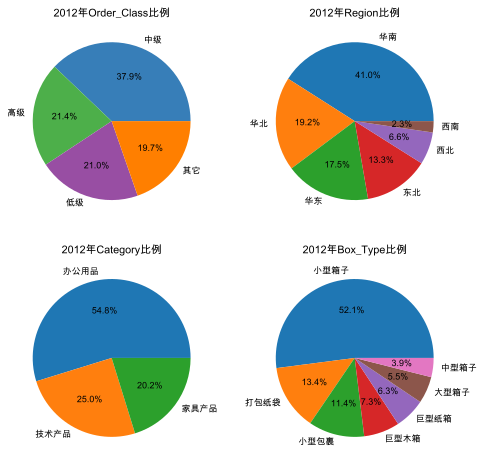

In [5]:
def set_figsize(figsize=(5, 4)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize # 图片的尺寸为3.5，2.5
plt.rc('font', family='Arial Unicode MS', size=9) # Mac系统中文设置
# plt.rc('font', family='SimHei', size=9) # Win系统中文设置
set_figsize((8, 8))
plt.subplot(221)
num_Class = df['Order_Class'][df.year==2012].value_counts()
colors = ["#377eb8","#4daf4a","#984ea3","#ff7f00"]
plt.pie(num_Class, labels=num_Class.index, autopct="%.1f%%", colors=colors)
# # ax1 = plt.subplot(2, 3, 1)
plt.title('2012年Order_Class比例')
plt.subplot(222)
plt.rc('font', family='Arial Unicode MS', size=9)
num_Class = df['Region'][df.year==2012].value_counts()
# colors = ["#377eb8","#4daf4a","#984ea3","#ff7f00"]
plt.pie(num_Class, labels=num_Class.index, autopct="%.1f%%")
# # ax1 = plt.subplot(2, 3, 1)
plt.title('2012年Region比例')
plt.subplot(223)
plt.rc('font', family='Arial Unicode MS', size=9)
num_Class = df['Category'][df.year==2012].value_counts()
# colors = ["#377eb8","#4daf4a","#984ea3","#ff7f00"]
plt.pie(num_Class, labels=num_Class.index, autopct="%.1f%%")
# # ax1 = plt.subplot(2, 3, 1)
plt.title('2012年Category比例')
plt.subplot(224)
plt.rc('font', family='Arial Unicode MS', size=9)
num_Class = df['Box_Type'][df.year==2012].value_counts()
# colors = ["#377eb8","#4daf4a","#984ea3","#ff7f00"]
plt.pie(num_Class, labels=num_Class.index, autopct="%.1f%%")
# # ax1 = plt.subplot(2, 3, 1)
plt.title('2012年Box_Type比例')
plt.show()

/var/folders/6j/kc_963x15_x5ygyn0h922skm0000gn/T/ipykernel_60822/1273012783.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # svg是矢量图格式


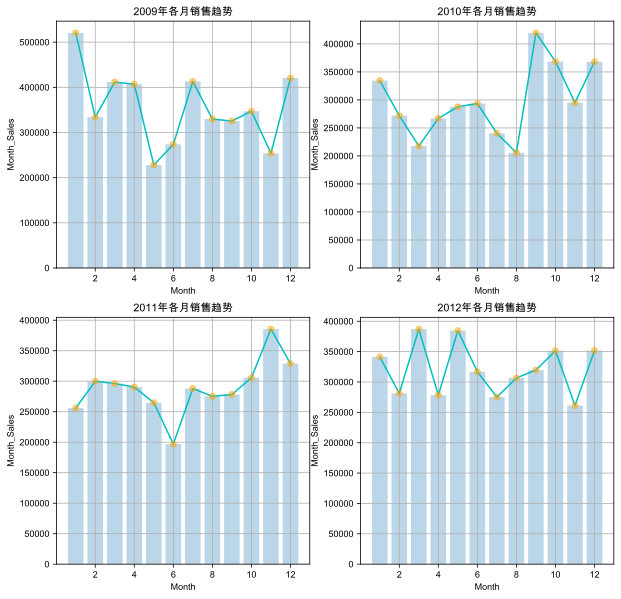

In [6]:
set_figsize((10, 10))
plt.subplot(221)
month_Sales = df[df.year == 2009].groupby(df.month).aggregate({'Sales': np.sum})
months = list(range(1, 13))
plt.plot(months, month_Sales, 'c')
plt.plot(months, month_Sales, 'o', color='orange', alpha=0.5)
plt.bar(months, month_Sales.values.flatten(), alpha=0.3)
plt.title('2009年各月销售趋势')
plt.xlabel('Month')
plt.ylabel('Month_Sales')
plt.grid()
plt.subplot(222)
month_Sales = df[df.year == 2010].groupby(df.month).aggregate({'Sales': np.sum})
months = list(range(1, 13))
plt.plot(months, month_Sales, 'c')
plt.plot(months, month_Sales, 'o', color='orange', alpha=0.5)
plt.bar(months, month_Sales.values.flatten(), alpha=0.3)
plt.title('2010年各月销售趋势')
plt.xlabel('Month')
plt.ylabel('Month_Sales')
plt.grid()
plt.subplot(223)
month_Sales = df[df.year == 2011].groupby(df.month).aggregate({'Sales': np.sum})
months = list(range(1, 13))
plt.plot(months, month_Sales, 'c')
plt.plot(months, month_Sales, 'o', color='orange', alpha=0.5)
plt.bar(months, month_Sales.values.flatten(), alpha=0.3)
plt.title('2011年各月销售趋势')
plt.xlabel('Month')
plt.ylabel('Month_Sales')
plt.grid()
plt.subplot(224)
month_Sales = df[df.year == 2012].groupby(df.month).aggregate({'Sales': np.sum})
months = list(range(1, 13))
plt.plot(months, month_Sales, 'c')
plt.plot(months, month_Sales, 'o', color='orange', alpha=0.5)
plt.bar(months, month_Sales.values.flatten(), alpha=0.3)
plt.title('2012年各月销售趋势')
plt.xlabel('Month')
plt.ylabel('Month_Sales')
plt.grid()
plt.show()

/var/folders/6j/kc_963x15_x5ygyn0h922skm0000gn/T/ipykernel_60822/1273012783.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # svg是矢量图格式


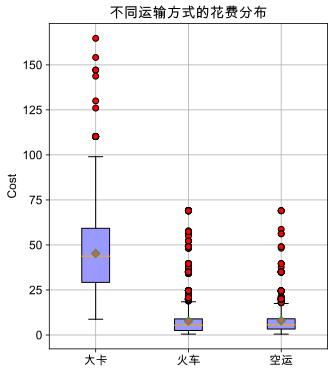

In [7]:
Trans1 = df.Trans_Cost.groupby(df.Transport).get_group('大卡')
Trans2 = df.Trans_Cost.groupby(df.Transport).get_group('火车')
Trans3 = df.Trans_Cost.groupby(df.Transport).get_group('空运')
dd = [Trans1, Trans2, Trans3]
# dd = list(map(df.Trans_Cost.groupby(df.Transport).get_group, keys))
xlabels = ['大卡','火车','空运']
set_figsize((5, 6))
plt.rc('font', family='Arial Unicode MS', size=12)
plt.boxplot(dd, labels=xlabels, 
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'-','color':'orange'}) # 设置中位数线的属性，线的类型和颜色)
plt.title('不同运输方式的花费分布')
plt.ylabel('Cost')
plt.grid()
plt.show()

/var/folders/6j/kc_963x15_x5ygyn0h922skm0000gn/T/ipykernel_60822/1273012783.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # svg是矢量图格式


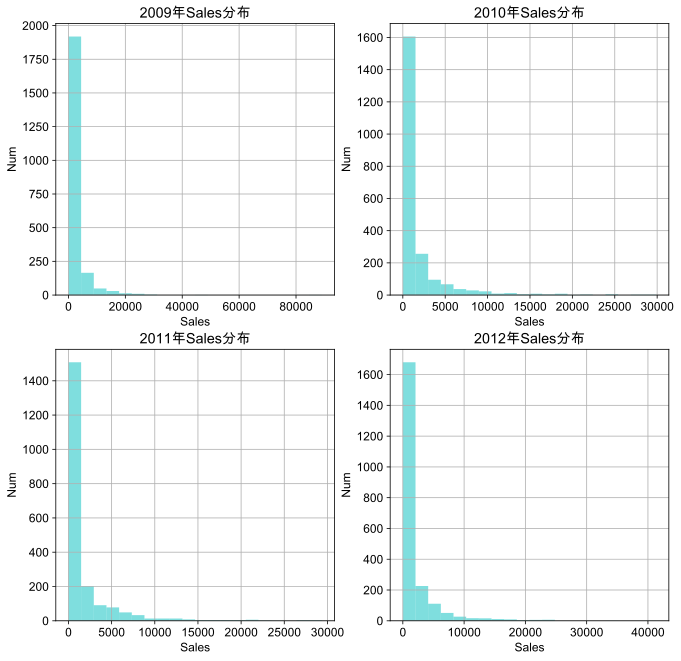

In [8]:
set_figsize((11, 11))
plt.subplot(221)
Sales_2012 = df.Sales[df.year==2009]
plt.hist(Sales_2012, bins=20, color='c', alpha=0.5)
plt.grid()
plt.xlabel('Sales')
plt.ylabel('Num')
plt.title('2009年Sales分布')
plt.subplot(222)
Sales_2012 = df.Sales[df.year==2010]
plt.hist(Sales_2012, bins=20, color='c', alpha=0.5)
plt.grid()
plt.xlabel('Sales')
plt.ylabel('Num')
plt.title('2010年Sales分布')
plt.subplot(223)
Sales_2012 = df.Sales[df.year==2011]
plt.hist(Sales_2012, bins=20, color='c', alpha=0.5)
plt.grid()
plt.xlabel('Sales')
plt.ylabel('Num')
plt.title('2011年Sales分布')
plt.subplot(224)
Sales_2012 = df.Sales[df.year==2012]
plt.hist(Sales_2012, bins=20, color='c', alpha=0.5)
plt.grid()
plt.xlabel('Sales')
plt.ylabel('Num')
plt.title('2012年Sales分布')
plt.show()